<a href="https://colab.research.google.com/github/GoAshim/Artificial-Neural-Network-with-TensorFlow/blob/main/05_Multiclass_Classification_with_Tensorflow_Image_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification
In Multiclass Classification we build neural network model using Tensorflow to predict outcome which can be one of 3 or more classes. In this project, we are going to build neural network model which will classify images different types (more than 2) of clothing.

We have seen in previous project how to handle **binary classification**, where we built neural network model to predict whether a person has breast cancer or not (click [here](https://github.com/GoAshim/Deep-Learning-with-TensorFlow/blob/a62a4a5e741d9d0b2911d55edc2f6fcf1ef7291f/04_Binary_Classification_using_TensorFlow_Predict_Breast_Cancer.ipynb))

### Step 1 - Import Libraries

In [1]:
# Import necessary libraries

# For data analysis and modeling
import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# For the dataset
from tensorflow.keras.datasets import fashion_mnist

### Step 2 - Load Data
We will load the data publicly available fashion_mnist dataset (can be found [here](https://www.tensorflow.org/datasets/catalog/fashion_mnist)). Like other tensorflow datasets, this one is already split between train and test datasets.

In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### Step 3 - Exploratory Data Analysis (EDA)

In [3]:
# Print the first element of training data and label

print("First data element: ", X_train[0])
print("\nFirst label element: ", y_train[0])

First data element:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

In [4]:
# Check the shape of the training data and training labels
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [5]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

#####Observation
So from the above code we see that
* The training and test dataset consist of 60000 and 10000 images and their corresponding labels.  
* Each element of training data (image) is 2 dimensional matrix of 28 by 28 (pixels).
* The label is one number representing each type of image, so it's scaler and hence has 0 dimension.

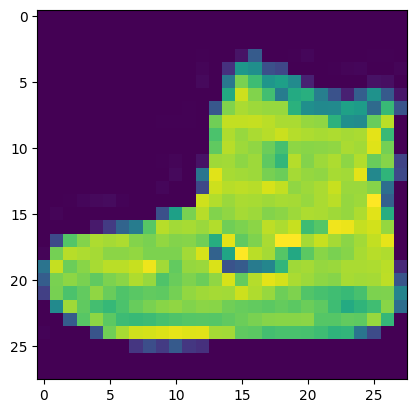

In [6]:
# Plot the first element of training data (we saw the number value representing every pixel of that data element)
plt.imshow(X_train[0]);

In [7]:
# Print the label of the first element again
y_train[0]

9

In [8]:
# Let's create the list with labels from the fashion mnist dataset
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# Now we can use the labels list to see the label for the first data element of the training set
print("The first element of the training dataset represents ", labels[y_train[0]])

The first element of the training dataset represents  Ankle boot


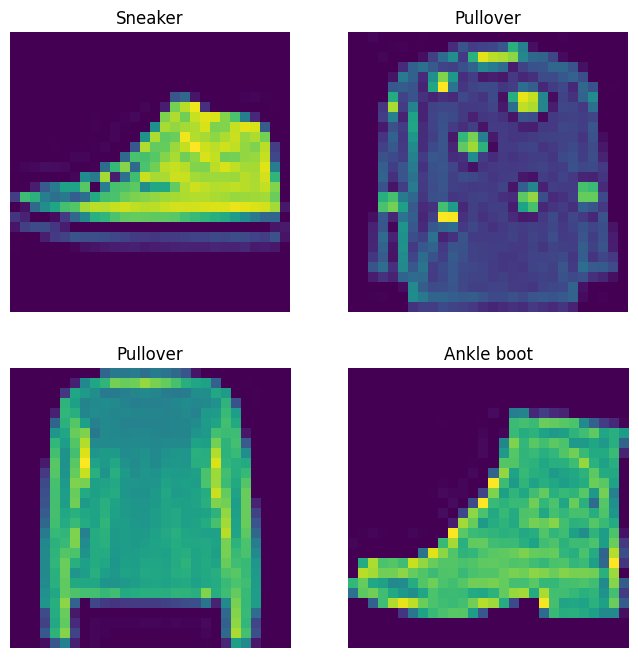

In [10]:
# Now instead of checking the data element and the corresponding label of one element at a time, let's write code to plot
# 4 the image and the corresponding label of 4 random data elements. We can run that set of code multiple times to get better
# understanding of our data

plt.figure(figsize=(8, 8))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  # Pick a random number, which will be the index of the element we want to plot
  ind = rnd.choice(range(len(X_train)))
  plt.imshow(X_train[ind])
  plt.title(labels[y_train[ind]])
  plt.axis(False);

### Step 4 - Build Multi-class Classification Model

#### Experiment 1
Build the first model with 1 hidden layer of 16 nurons, fit it with the training data and see how it evaluates on the test data.

In [11]:
# Create random seed
tf.random.set_seed(42)

# Build the model
model_01 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # The shape of each element of training data
    tf.keras.layers.Dense(16, activation="relu"), # Hidden layer with 4 nurons and relu activation
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # Output layer with 10 nurons, one for each of the 10 output classes
])

# Compile the model
model_01.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Using SparseCategoricalCrossentropy because our data isn't encoded
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
hist_01 = model_01.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.5978 - accuracy: 0.1357 - val_loss: 2.0986 - val_accuracy: 0.1767
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0772 - accuracy: 0.1740 - val_loss: 2.0155 - val_accuracy: 0.2030
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9463 - accuracy: 0.2149 - val_loss: 1.7661 - val_accuracy: 0.2646
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7248 - accuracy: 0.2740 - val_loss: 1.6775 - val_accuracy: 0.2950
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6573 - accuracy: 0.2978 - val_loss: 1.6787 - val_accuracy: 0.3203
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6315 - accuracy: 0.3156 - val_loss: 1.6128 - val_accuracy: 0.3396
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5852 - accuracy: 0.3370 - val_loss: 1.5879 - val_accuracy:

##### Observation
Based on above result, we see after 10 epochs our first model has 35% accuracy. As our data has 10 output classes, if we make random guess, we should get 10% accuracy. So our model is 5 times better predicting the output than pure random guess. However we will do few more experiments to see if we can improve the model accuracy.

#### Experiment 2
Let's increase the number of nurons and see if that impacts on model accuracy.

In [12]:
# Create random seed
tf.random.set_seed(42)

# Build the model
model_02 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_02.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model with training data and evaluate on test data
hist_02 = model_02.fit(X_train,
                       y_train,
                       epochs=10,
                       validation_data=(X_test, y_test)
                       )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.7593 - accuracy: 0.7072 - val_loss: 0.7916 - val_accuracy: 0.7385
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6617 - accuracy: 0.7665 - val_loss: 0.7377 - val_accuracy: 0.7525
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5840 - accuracy: 0.7989 - val_loss: 0.6046 - val_accuracy: 0.7802
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5451 - accuracy: 0.8160 - val_loss: 0.5665 - val_accuracy: 0.8191
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5174 - accuracy: 0.8248 - val_loss: 0.5363 - val_accuracy: 0.8225
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.8313 - val_loss: 0.5674 - val_accuracy: 0.8030
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4871 - accuracy: 0.8365 - val_loss: 0.5276 - val_accuracy:

##### Observation
Based on above result, we see after 10 epochs our second model has more than 80% of accuracy with test data. So we can infer that by reducing one hidden layer and increasing the number of nurons in the remaining hidden layer has increased the model accuracy from 35% to 80%. So we will continue with our second model and run few more experiemnts with different settings.

In [13]:
# Let's check the summary of the model
model_02.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Observation
The model summary gives two information -
* **Output shape** - It indicates the shape of the layer. So in our case the flatten layer has 28*28 (the shape of each of the input unit) = 784. The Dense layers has the shape as the number of nurons we chose for the respective layer.
* **Param** - It's the product of input shape and the number of nurons for each of the dense layer. It follows the calculation as [output shape of the previous layer] X [number of nurons in the dense layer] + [number of nurons in the dense layer].

#### Experiment 3
Let's run another experiment with the same model we got from the second experiemnt as that gave us much better result. However this time we will scale (normalize) our input data (both train and test) and see if that scaling is causing any improvement of our model performance.

In [14]:
# Find the minimum and maximum of our training and test data
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0, 255, 0, 255)

This means the minimum and maximum numerical value in each pixel of the 28 by 28 pixel image of both training and test data can be 0 and 255 respectively. So we can divide the pixel value by the maximum value (255) to get our input data scaled to fall between 0 and 1, which is called **Normalization**.

In [15]:
X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_test.max()

# Find the minimum and maximum of our training and test data after normalization
X_train_norm.min(), X_train_norm.max(), X_test_norm.min(), X_test_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [17]:
# Now let's run the experiemnt on normalized data with our previous model

# Create random seed
tf.random.set_seed(42)

# Create the model
model_03 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_03.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model with the normalized training data and evaluate on the normalized test data
hist_03 = model_03.fit(X_train_norm,
                       y_train,
                       epochs=10,
                       validation_data=(X_test_norm, y_test)
                       )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4990 - accuracy: 0.8248 - val_loss: 0.4229 - val_accuracy: 0.8456
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8652 - val_loss: 0.4578 - val_accuracy: 0.8445
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3374 - accuracy: 0.8768 - val_loss: 0.3816 - val_accuracy: 0.8594
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8852 - val_loss: 0.4058 - val_accuracy: 0.8529
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2949 - accuracy: 0.8907 - val_loss: 0.3684 - val_accuracy: 0.8718
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2796 - accuracy: 0.8964 - val_loss: 0.3896 - val_accuracy: 0.8556
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.8995 - val_loss: 0.3524 - val_accuracy:

##### Observation
Based on above result, we see after 10 epochs our third model has about 88% of accuracy with the test data. So we can infer that by running the normalized data with the same model has increased the model accuracy from 82% to 88%. This establishes the fact that neural networks prefer data which is scaled or normalized, meaning it will be between 0 and 1.

### Step 5 - Evaluate Multi-class Classification Models
In this steps we will check various attributes of the models we used in the previous experiemnts.

#### Plot Loss Curve
We will plot loss curve of the model with the non-normalized data (experiemnt 2) and that with the normalized data (experiemnt 3).

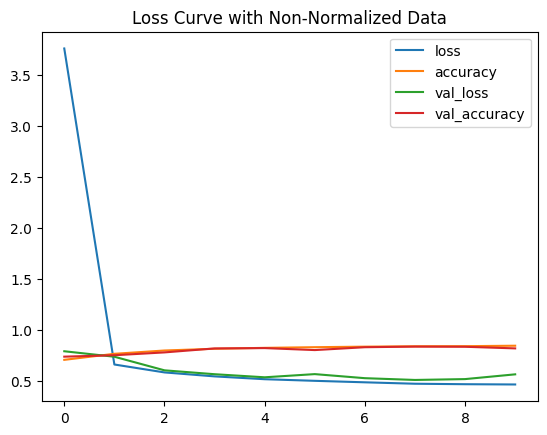

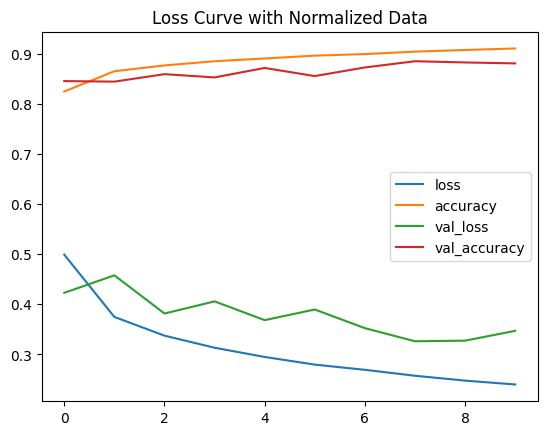

In [19]:
pd.DataFrame(hist_02.history).plot(title="Loss Curve with Non-Normalized Data")
pd.DataFrame(hist_03.history).plot(title="Loss Curve with Normalized Data");

##### Observation
Based on the loss curves above, we see that the loss is comparatively smaller and the accuracy is comparatively higher when we are running the neural network model with normalized data.

#### Find the Ideal Learning Rate
Ideal learning rate is the learning rate when the loss decreases the most. To do that, we will run the same experiemnt 3 but this time with learning rate callback.


In [20]:
# Create random seed
tf.random.set_seed(42)

# Create the model
model_04 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_04.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create a learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model with the normalized training data and evaluate on the normalized test data
hist_04 = model_04.fit(X_train_norm,
                       y_train,
                       epochs = 40,
                       validation_data = (X_test_norm, y_test),
                       callbacks=[lr_schedule]
                       )

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5015 - accuracy: 0.8251 - val_loss: 0.4346 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3802 - accuracy: 0.8638 - val_loss: 0.4658 - val_accuracy: 0.8416 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3439 - accuracy: 0.8747 - val_loss: 0.3830 - val_accuracy: 0.8572 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3229 - accuracy: 0.8814 - val_loss: 0.4047 - val_accuracy: 0.8563 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8855 - val_loss: 0.3823 - val_accuracy: 0.8683 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2999 - accuracy: 0.8891 - val_loss: 0.3871 - val_accuracy: 0.8569 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

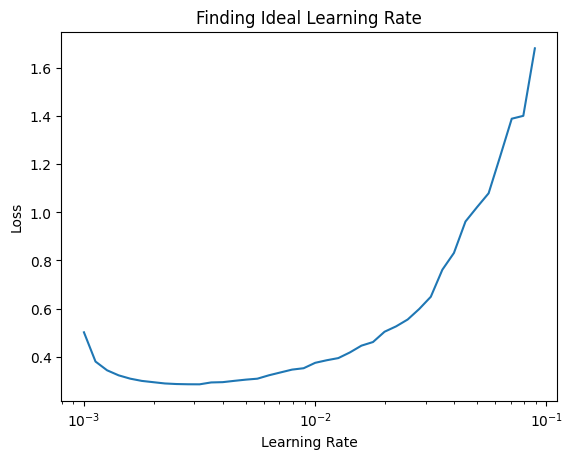

In [21]:
# Plot the learning rate curve in log scaled plot
xax = 1e-3 * (10**(tf.range(40)/20))
yax = hist_04.history['loss']
plt.semilogx(xax, yax)
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate");

##### Observation
Based on the above learning rate curve, we see that the loss is minimum at about 0.002 or 2e-3, which is very close to the default learning rate (0.001) of Adam optimizer we are using. So we will use that learning rate and run our model with normalized data.

#### Experiment 5
Let's run another experiment with the same model and normalized data but this time with learning rate as 0.002 as we found above that is the ideal learning rate.

In [22]:
# Create random seed
tf.random.set_seed(42)

# Create the model
model_05 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_05.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

# Fit the model with the normalized training data and evaluate on the normalized test data
hist_05 = model_05.fit(X_train_norm,
                       y_train,
                       epochs=20,
                       validation_data=(X_test_norm, y_test)
                       )

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4832 - accuracy: 0.8285 - val_loss: 0.4069 - val_accuracy: 0.8517
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8672 - val_loss: 0.4382 - val_accuracy: 0.8482
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3356 - accuracy: 0.8767 - val_loss: 0.3847 - val_accuracy: 0.8598
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3149 - accuracy: 0.8845 - val_loss: 0.3955 - val_accuracy: 0.8591
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2985 - accuracy: 0.8899 - val_loss: 0.3757 - val_accuracy: 0.8643
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.8935 - val_loss: 0.3811 - val_accuracy: 0.8553
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2763 - accuracy: 0.8965 - val_loss: 0.3822 - val_accuracy: